### Feature Extraction with Eigen Face

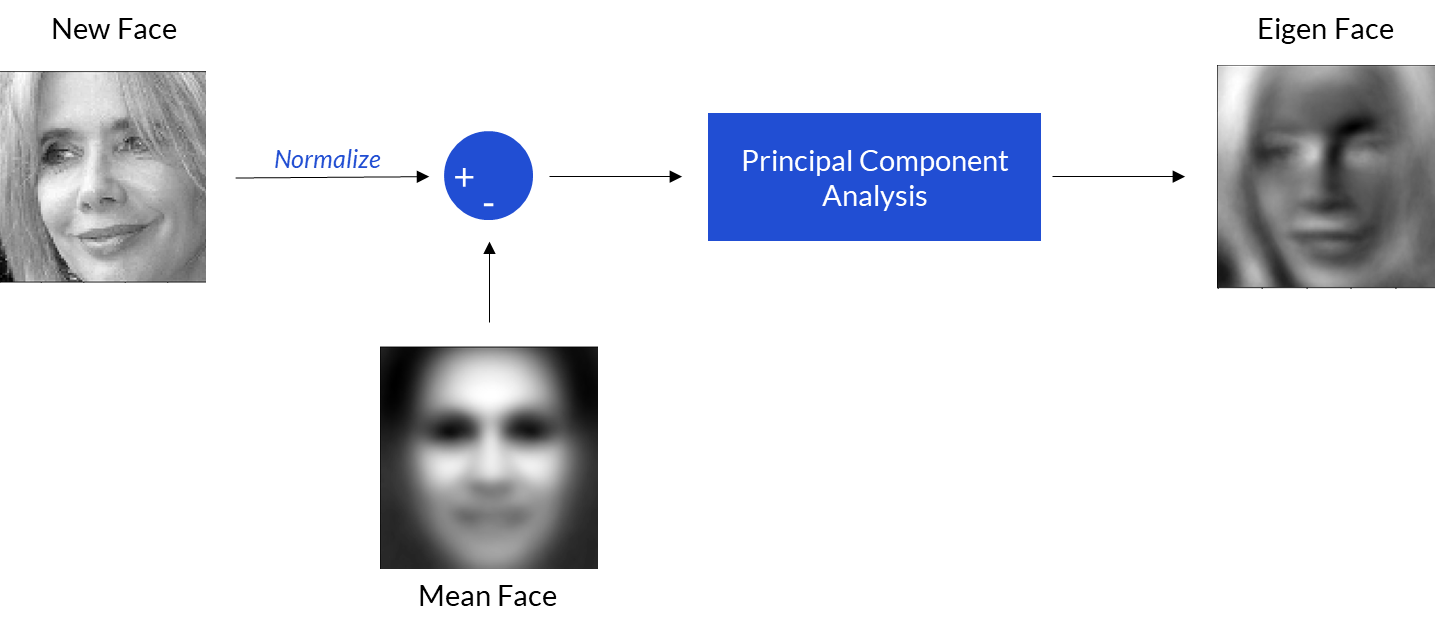

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [11]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) # load the data

In [12]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.337255,0.313725,0.309804,0.317647,0.321569,0.321569,0.337255,0.376471,0.388235,0.360784,...,0.364706,0.376471,0.407843,0.411765,0.392157,0.439216,0.494118,0.505882,0.521569,female
1,0.078431,0.105882,0.137255,0.243137,0.027451,0.160784,0.098039,0.176471,0.203922,0.325490,...,0.654902,0.650980,0.658824,0.662745,0.643137,0.631373,0.188235,0.176471,0.160784,female
2,0.250980,0.258824,0.250980,0.235294,0.223529,0.196078,0.156863,0.133333,0.152941,0.200000,...,0.109804,0.098039,0.117647,0.145098,0.149020,0.129412,0.149020,0.176471,0.160784,female
3,0.541176,0.447059,0.258824,0.211765,0.262745,0.286275,0.243137,0.243137,0.243137,0.160784,...,0.117647,0.215686,0.294118,0.349020,0.376471,0.380392,0.270588,0.149020,0.133333,female
4,0.200000,0.215686,0.215686,0.227451,0.235294,0.250980,0.258824,0.278431,0.290196,0.298039,...,0.701961,0.733333,0.764706,0.788235,0.800000,0.807843,0.803922,0.807843,0.800000,female


##### Eigen Face

In [13]:
# Mean Face
X = data.drop('gender',axis=1).values # all images

In [14]:
X

array([[0.3372549 , 0.31372549, 0.30980392, ..., 0.49411765, 0.50588235,
        0.52156863],
       [0.07843137, 0.10588235, 0.1372549 , ..., 0.18823529, 0.17647059,
        0.16078431],
       [0.25098039, 0.25882353, 0.25098039, ..., 0.14901961, 0.17647059,
        0.16078431],
       ...,
       [0.53333333, 0.75294118, 0.70196078, ..., 0.13333333, 0.12941176,
        0.12941176],
       [0.14117647, 0.1254902 , 0.14117647, ..., 0.00784314, 0.10196078,
        0.13333333],
       [0.28235294, 0.26666667, 0.25490196, ..., 0.9254902 , 0.84705882,
        0.89019608]])

In [15]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

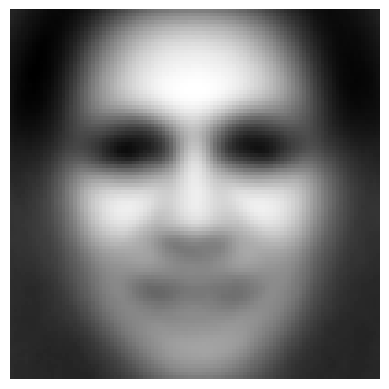

In [16]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

**Subtract data with mean face**

In [17]:
X_t = X - mean_face # transformed data

**Apply X_t data to PCA**

- Find the right number of component - Elbow
- With right number compnent computer Principal components

In [18]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

,n_components,None
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [20]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.254083,0.254083,1
1,0.113636,0.367719,2
2,0.105088,0.472808,3
3,0.052449,0.525257,4
4,0.033081,0.558338,5


In [21]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

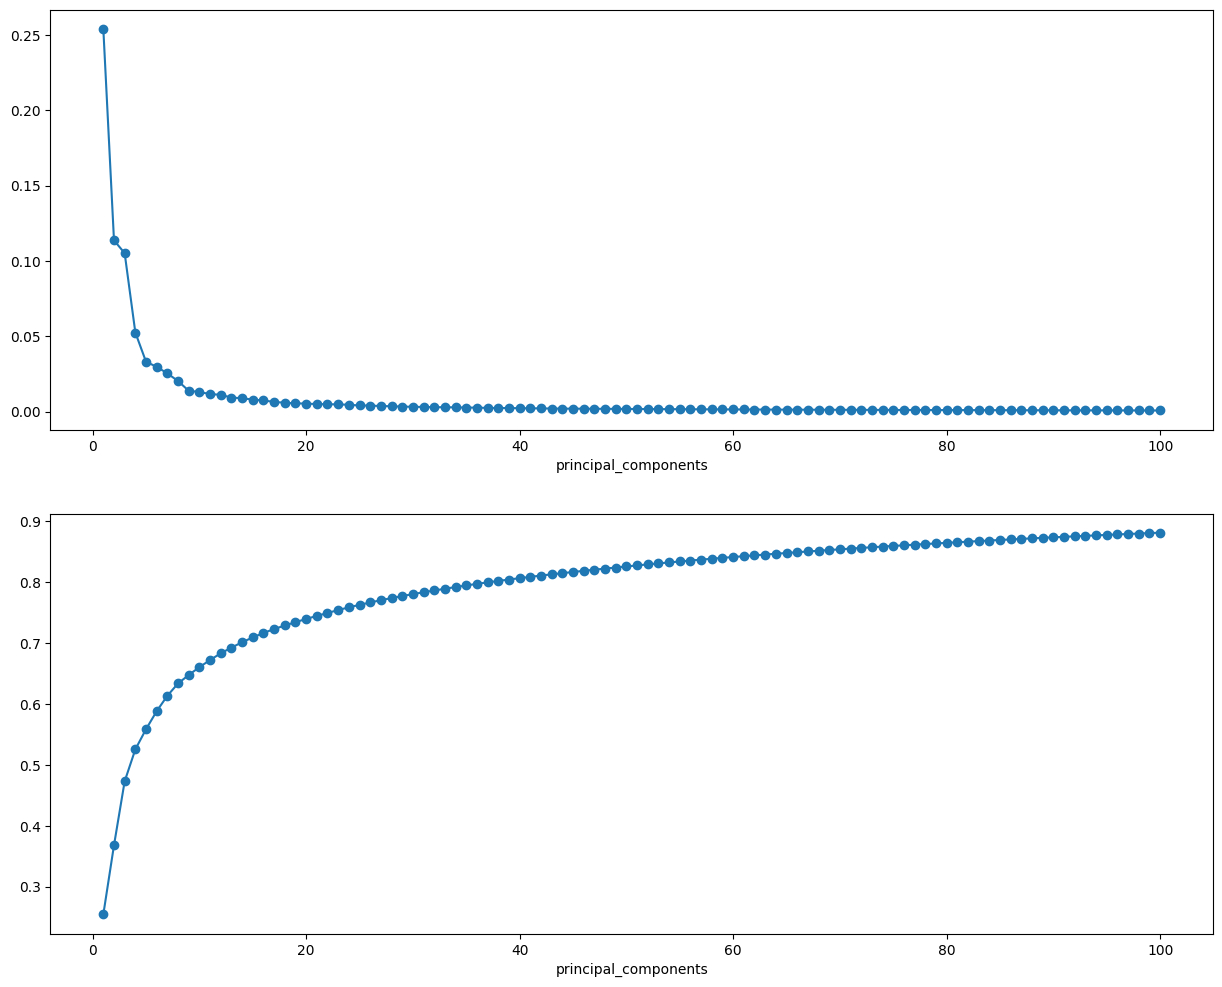

In [22]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

From above plot, it is clear that with approximately **50 pricipal components having 80%** converage.

In [33]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [34]:
pca_data.shape

(6540, 50)

In [43]:
# saving data and models
y = data['gender'].values # independent variables
np.savez('data/data_pca_50_target',pca_data,y)

In [44]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [45]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

### Visualize Eigen Image

In [46]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [47]:
pca_data_inv.shape

(6540, 10000)

In [48]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

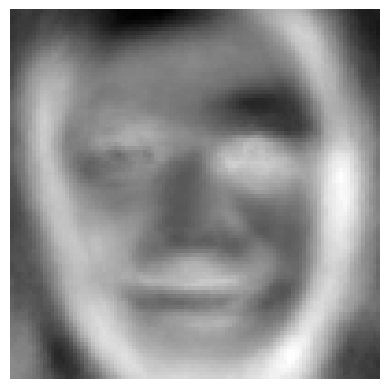

In [49]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

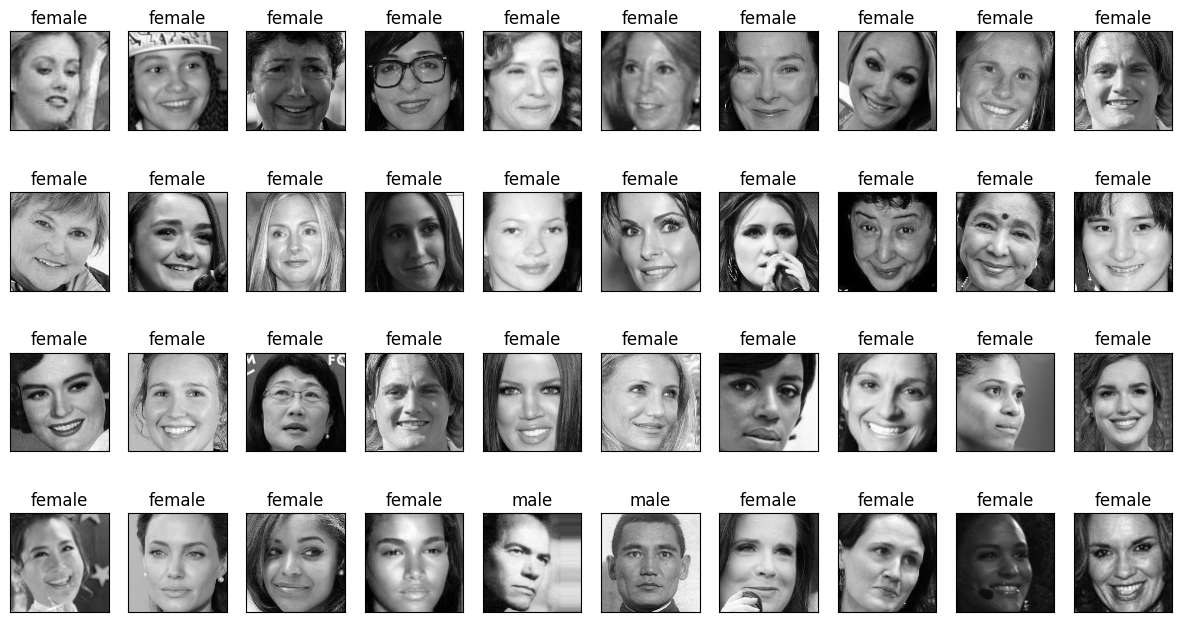

====================Eigen Images====================


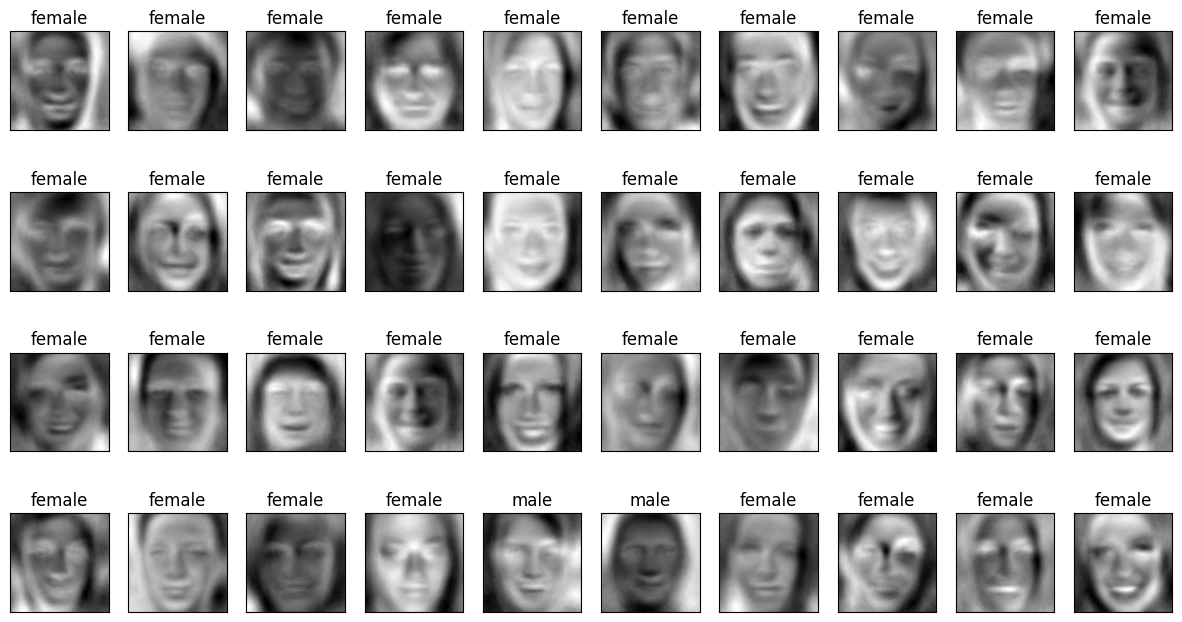

In [50]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()